文献：<p>
1.数据挖掘原理（第四版） 麦可斯·布拉德 清华大学出版社<p>
2.数据挖掘概念与技术  Jiawei Han  Micheline Kamber  机械工业出版社<p>
3.python商业数据分析  张瑾  人大出版社<p>
4.scikit-learn 机器学习 2 加文·海克 中国工信出版集团<p>
## 11.4 支持向量机

<font color='red'>参考文献 【2】数据挖掘概念与技术 Jiawei Han Micheline Kamber 机械工业出版社</font>

本节研究**支持向量机(Support Vector Machine)**，一种线性和非线性数据的有前途的新分类方法。简要地说，**支持向量机(或SVM)**是一种算法，按以下方法执行。使用一种非线性映射，将原训练数据映射到较高的维。在新的维上，它搜索线性最佳分离超平面(即将一类的的元组与其他类分离的“决策边界”)。使用一个适当的对足够高维的非线性映射，两类的数据总可以被超平面分开。**SVM**使用支持向量(“基本”训练元组)和边缘(由支持向量定义)发现该超平面。下面，我们将更深入地讨论这些新概念。<p>
“我听说最近SVM引起了极大关注，为什么?”支持向量机的第一篇文章由Vapnik和他的同事Bernhard Boser和Isabelle Guyon于1992年发表，其基础工作在20世纪60年代已经出现(包括Vapnik和AlexeiChervonenkis关于统计学习理论的早期工作)。即使最快的**SVM**的训练时间也非常长，但是，它们对复杂的非线性决策边界的建模能力是高度准确的。与其他模型相比，它们不太容易过分拟合。支持向量还提供了学习模型的紧凑表示。SVM可以用来预测和分类。它们已经用在许多领域，包括手写数字识别、对象识别、语音识别，以及基准时间序列预测检验。

### 11.4.1 线性SVM(硬间隔和软间隔)

<font color='red'>参考文献 西瓜+ppt（wangxi class 6）</font>

(1)**间隔与支持向量**

给定训练样本集$D=\left\{\left(\boldsymbol{x}_1, y_1\right),\left(\boldsymbol{x}_2, y_2\right), \ldots,\left(\boldsymbol{x}_m, y_m\right)\right\}, y_i \in\{-1,+1\}$，分类学习最基本的想法就是基于训练集D在样本空间中找到一个划分超平面、将不同类别的样本分开但能将训练样本分开的划分超平面可能有很多，如图11.4.1-1所示，我们应该努力去找到哪一个昵?

图11.4.1-1

<img src="https://cdn.mathpix.com/snip/images/w8ph-VoqoSUWSdhwoOAIP8ah7370Vo32TOh2cczjHuw.original.fullsize.png" />

直观上看,应该去找位于两类训练样本"正中间"的划分超平面，即上图中黑色加粗的那个，因为该划分超平面对训练样本局部扰动的"容忍"性最好.例如，由于训练集的局限性或噪声的因素，训练集外的样本可能比上图中的训练样本更接近两个类的分隔界，这将使许多划分超平面出现错误，而红色的超平面受影响最小.换言之，这个划分超平面所产生的分类结果是最鲁棒的，对未见示例的泛化能力最强。

在样本空间中，划分超平面可通过如下线性方程来描述:

$$w^Tx+b=0$$

其中 $w=(w_1;w_2;...;w_d)$为法向量,决定了超平面的方向;$b$为位移项，决定了超平面与原点之间的距离.显然，划分超平面可被法向量$w$和位移$b$确定，下面我们将其记为$(w,b)$的.样本空间中任意点$x$到超平面$(w,b)$的距离可写为

$$
r=\frac{\left|\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}+b\right|}{\|\boldsymbol{w}\|}
$$

假设超平面$(w,b)$的能将训练样本正确分类，即对于$\left(\boldsymbol{x}_i, y_i\right) \in D$,若$y_i=+1$,则有$w^Tx_i$+b>0$;若$y_i=-1$,则有$w^Tx_i$+b<0$。令

$$
\begin{cases}\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}_i+b \geqslant+1, & y_i=+1 \\ \boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}_i+b \leqslant-1, & y_i=-1\end{cases}
$$

如图11.4.1-2所示，距离超平面最近的这几个训练样本点使上式的等号成立，它们被称为"支持向量" (support vector)，两个异类支持向量到超平面的距离之和为

$$
r=\frac{2}{\|\boldsymbol{w}\|}
$$

它被称为"**间隔**" (margin)

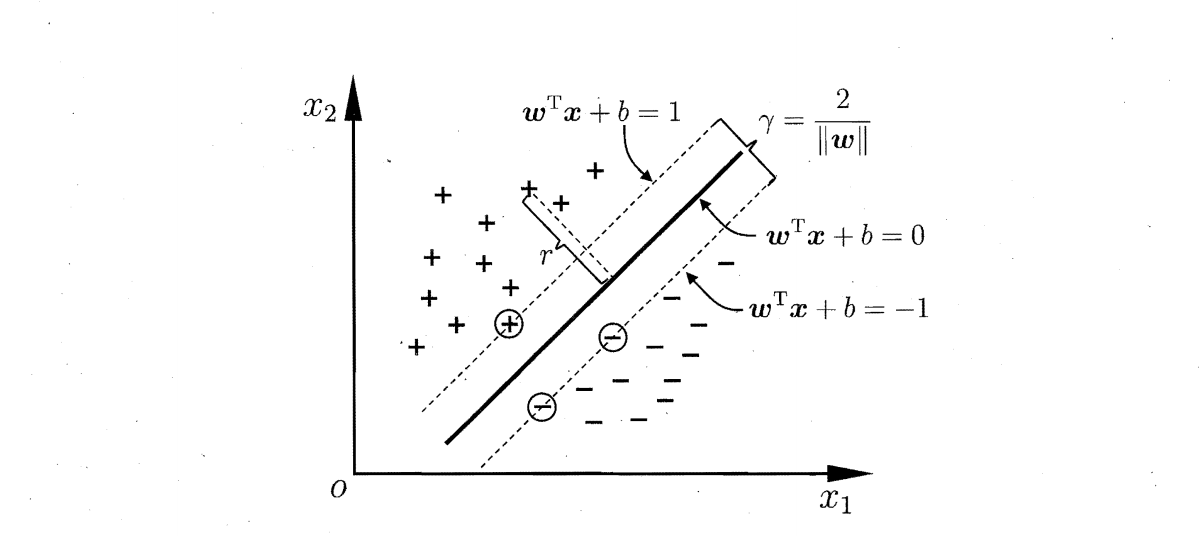

欲找到具有"最大间隔"(maximum margin)的划分超平面，也就是要找到能满足式上上式中约束的参数$w$和$b$，使得$\gamma$最大，即

$$
\begin{aligned}
\max _{\boldsymbol{w}, b} & \frac{2}{\|\boldsymbol{w}\|} \\
\text { s.t. } & y_i\left(\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}_i+b\right) \geqslant 1, \quad i=1,2, \ldots, m .
\end{aligned}
$$

显然，为了最大化间隔，仅需最大化$\|w\|^{-1}$，这等价于最小化 $\|w\|^{2}$ 于是，可重写为

$$
\begin{aligned}
& \min _{\boldsymbol{w}, b} \frac{1}{2}\|\boldsymbol{w}\|^2 \\
& \text { s.t. } y_i\left(\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}_i+b\right) \geqslant 1, \quad i=1,2, \ldots, m .
\end{aligned}
$$

这就是支持向量机(Support Vector Machine ，简称 SVM) 的基本型.

(2)**对偶问题**

我们希望求上式来得到大间隔划分超平面所对应的模型：

$$
f(\boldsymbol{x})=\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}+b
$$

其中$w$和$b$是模型参数.注意到上式本身是一丁个凸二次规划 (convexquadratic programming)问题,能直接用现成的优化计算包求解，但我们可以有更高效的办法.

式使用拉格朗日乘子法可得到其"对偶问题" (dual problem).具体来说，对式上上式的每条约束添加拉格朗日乘子$a_i\geqslant0$则该问题的拉格朗日函数可写为

$$
L(\boldsymbol{w}, b, \boldsymbol{\alpha})=\frac{1}{2}\|\boldsymbol{w}\|^2+\sum_{i=1}^m \alpha_i\left(1-y_i\left(\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}_i+b\right)\right)
$$

其中$\alpha=(\alpha_1;\alpha_2;...;\alpha_m)$.令$L(w,b,\alpha)$对$w$和$b$的偏导为零可得

$$
\begin{aligned}
\boldsymbol{w} & =\sum_{i=1}^m \alpha_i y_i \boldsymbol{x}_i \\
0 & =\sum_{i=1}^m \alpha_i y_i
\end{aligned}
$$

令$L(w,b,\alpha)$中的$w$和$b$消去，

$$
\max _{\boldsymbol{\alpha}} \sum_{i=1}^m \alpha_i-\frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i \alpha_j y_i y_j \boldsymbol{x}_i^{\mathrm{T}} \boldsymbol{x}_j
$$

$$
\begin{array}{ll}
\text { s.t. } & \sum_{i=1}^m \alpha_i y_i=0 \\
& \alpha_i \geqslant 0, \quad i=1,2, \ldots, m
\end{array}
$$

解出$\alpha$后，求出$w$和$b$即可得到模型

$$
\begin{aligned}
f(\boldsymbol{x}) & =\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}+b \\
& =\sum_{i=1}^m \alpha_i y_i \boldsymbol{x}_i^{\mathrm{T}} \boldsymbol{x}+b
\end{aligned}
$$

从对偶问题上式 解出的问是式上上上上式中的拉格朗日乘子，它恰对应着训练样本 $(x_i,y_i)$. 注意到式上上上上上上式中有不等式约束,因此上述过程需满足 KKT(Karush-Kuhn-Tucker) 条件,即要求:

$$
\left\{\begin{array}{l}
\alpha_i \geqslant 0 ; \\
y_i f\left(\boldsymbol{x}_i\right)-1 \geqslant 0 ; \\
\alpha_i\left(y_i f\left(\boldsymbol{x}_i\right)-1\right)=0
\end{array}\right.
$$

于是，对任意训练样本$(x_i,y_i)$,总有问$\alpha_i=0$或$y_i f(x_i) =1$.若$\alpha_i=0$，则该样本将不会在上上式的求和中出现，也就不会对$f(x)$有任何影响;若问$\alpha_i>0$, 则必有$\alpha_i=1$，所对应的样本点位于最大间隔边界上，是一个支持向量.这显示出支持向量机的一个重要性质:训练完成后?大部分的训练样本都不需保留，最终模型仅与支持向量有关。<p>
那么?如何求解上上上式呢?不难发现 这是一个三次规划问题?可使用通用的二次规划算法来求解;然而?该问题的规模正比于训练样本数 这会在实际任务中造成很大的开销.为了避开这个障碍，人们通过利用问题本身的特性，提出了很多高效算法， SMO (Sequential Minimal Optimization) 是其中一个著名的代表 [Platt 1998]. <p>
SMO 的基本思路：

不断执行如下两个步骤直至收敛. <p>
• 第一步：选取一对需更新的变量$\alpha_i$和$\alpha_j$. <p>
• 第二步：固定$\alpha_i$和$\alpha_j$以外的参数, 求解对偶问题更新$\alpha_i$和$\alpha_j$.

当• 仅考虑$\alpha_i$和$\alpha_j$时, 对偶问题的约束变为
$$
\alpha_i y_i+\alpha_j y_j=-\sum_{k \neq i, j} \alpha_k y_k, \quad \alpha_i \geq 0, \quad \alpha_j \geq 0
$$

其中的偏移项 $b$：通过支持向量来确定

SMO算法之所以高效，恰由于在固定其他参数后，仅优化两个参数的过程能做到非常高效.

（3）**硬间隔和软间隔**

**硬间隔**：完全分类准确，即SVM中最优超平面<p>
**软间隔**：允许一定量的样本分类错误；优化函数包括两个部分，一部分是点到平面的间隔距离，一部分是误分类的损失个数；即相对于硬间隔，软间隔除了追求间隔最大化，还需要保证错误分类的样本数量尽可能少。

图片（ppt）
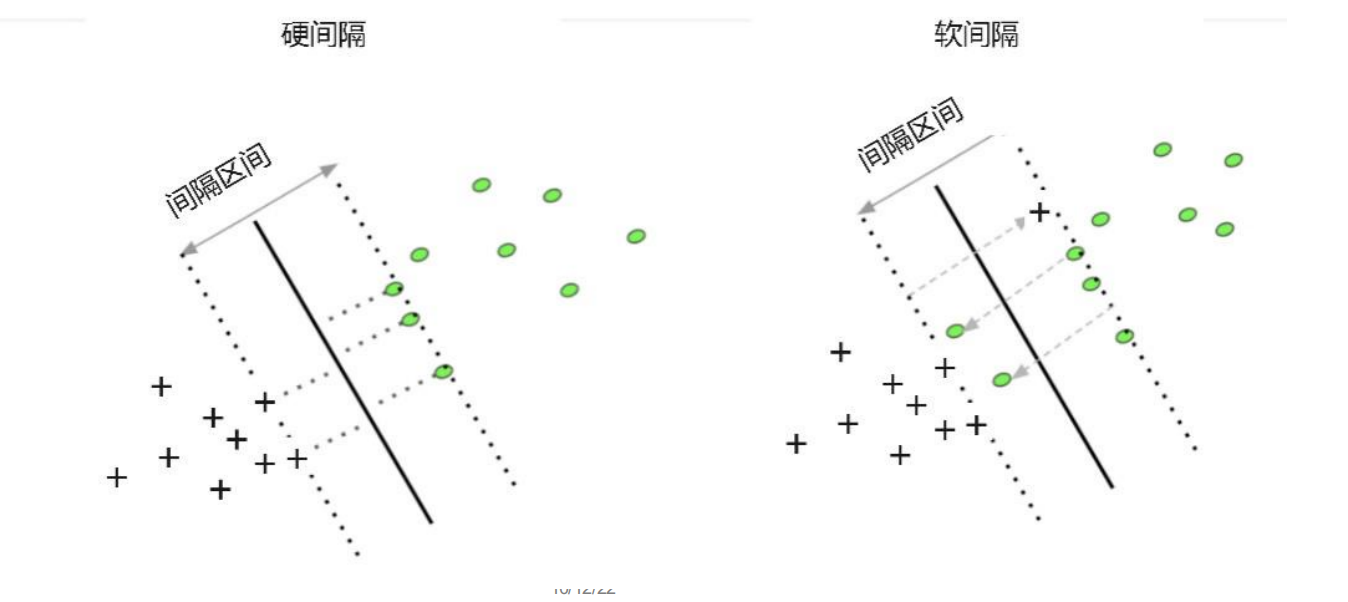

**软间隔**


图（西瓜书）
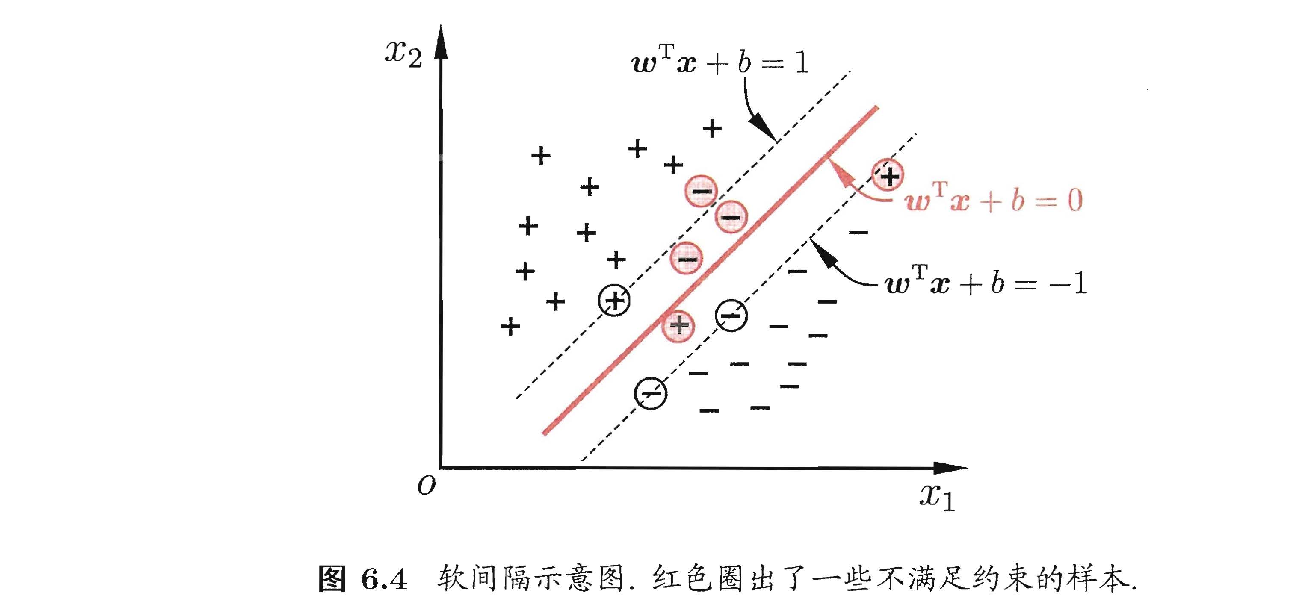

软间隔则是允许某些样本不满足约束
$$
y_i(w^Tx_i+b)\geq 1$$

当然，在最大化间隔的同时，不满足约束的样本应尽可能少.于是，优化目标可写为

$$
\min _{\boldsymbol{w}, b} \frac{1}{2}\|\boldsymbol{w}\|^2+C \sum_{i=1}^m \ell_{0 / 1}\left(y_i\left(\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}_i+b\right)-1\right)
$$

其中$C>O$是一个常数 .$\ell_{0 / 1}$是"0/1损失函数"

显然，当$C$为无穷大时，上上式迫使所有样本均满足约束上上上式，于是上上式等价于6式;当$C$取有限值时，式上上式允许一些样本不满足约束.

然而，$\ell_{0 / 1}$非凸、非连续，数学性质不太好，使得式(6.29) 不易直接求解.于是，人们通常用其他一些函数来代替$\ell_{0 / 1}$称为"替代损失" (surrogate 10ss). 替代损失函数一般具有较好的数学性质，如它们通常是凸的连续函数且是$\ell_{0 / 1}$的上界.图给出了三种常用的替代损失函数:

hinge 损失: $\ell_{\text {hinge }}(z)=\max (0,1-z)$;<p>
指数损失(exponential loss): $\ell_{\exp }(z)=\exp (-z)$;<p>
对率损失 (logistic loss $): \ell_{\log }(z)=\log (1+\exp (-z))$

图代替损失
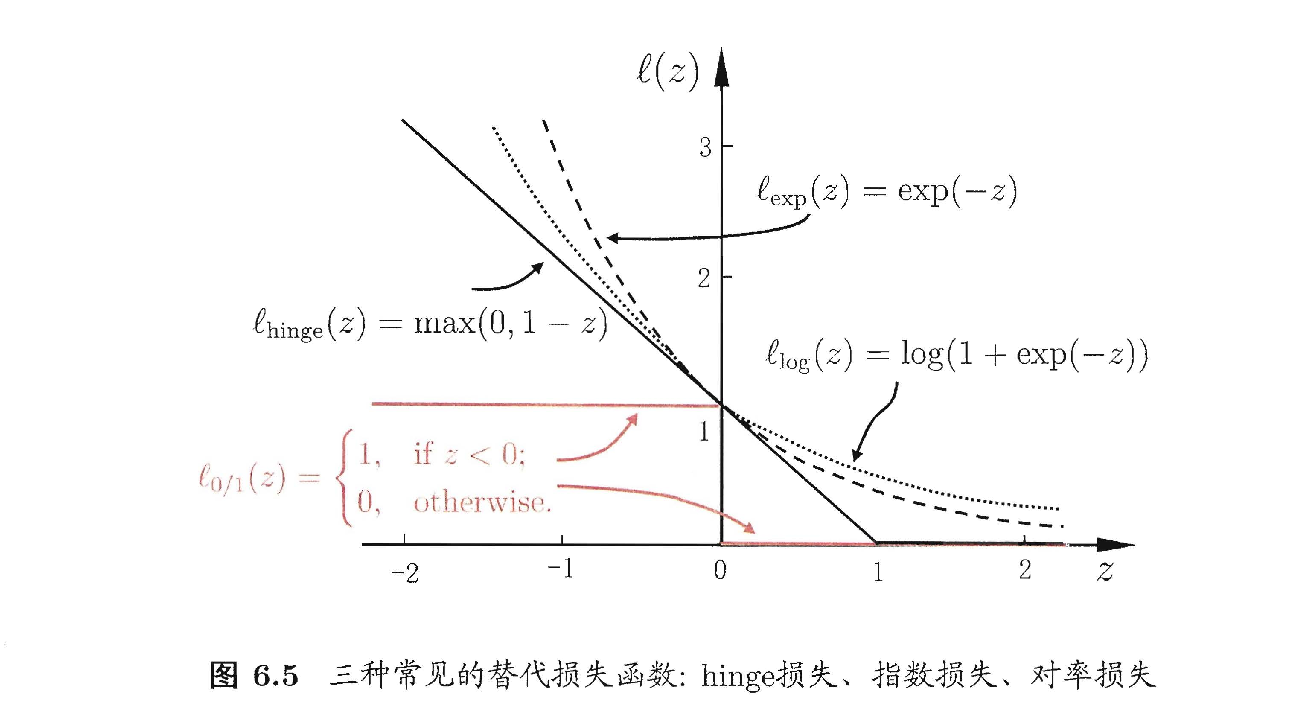

采用hinge损失函数保持了支持向量机的稀疏性，而对率损失是光滑的单调递减函数，不能找出类似支持向量的概念，因此对率回归的解依赖于更多的训练样本，其预测开销更大

我们还可以把式(6.29) 中的 0/1 损失函数换成别的替代损失函数以得到其他学习模型，这些模型的性质与所用的替代函数直接相关，但它们具有一个共性:优化目标中的第一项用来描述划分超平面的"间隔"大小，另一项:$
\sum_{i=1}^m \ell\left(f\left(\boldsymbol{x}_i\right), y_i\right)
$ 用来表述训练集上的误差，可写为更一般的形式

$$
\min _f \Omega(f)+C \sum_{i=1}^m \ell\left(f\left(\boldsymbol{x}_i\right), y_i\right)
$$

其中。$\Omega(f)$称为"结构风险" (structural risk) ，用于描述模型$f$的某些性质;第二项$\sum_{i=1}^m \ell\left(f\left(\boldsymbol{x}_i\right), y_i\right)
$称为"经验风险" (empirical risk) ，用于描述模型与训练数据的契合程度;$C$用于对二者进行折中.从经验风险最小化的角度来看$\Omega(f)$表述了我们希望获得具有何种性质的模型(例如希望获得复杂度较小的模型), 这为引入领域知识和用户意图提供了途径;另一方面，该信息有助于削减假设空间,从而降低了最小化训练误差的过拟合风险.从这个角度来说，上式为"正则化" (regularization) 问题。 $\Omega(f)$称为正则化项，$C$则称为正则化常数.$L_p$范数(norm) 是常用的正则化项，其中$L_2$范数$\|w\|_2$倾向$w$的分量取值尽量均衡，即非零分量个数尽量稠密,而$L_0$范数$\|w\|_0$和$L_1$范数$\|w\|_1$则倾向对$w$的分量尽量稀疏 即非零分量个数尽量少.

### 11.4.2 非线性SVM（核函数）

<font color='red'>参考文献 【2】.数据挖掘概念与技术 Jiawei Han Micheline Kamber 机械工业出版社+【3】3.python商业数据分析 张瑾 人大出版社+西瓜书</font>

在11.4.1节，我们学习了对线性可分的数据分类的线性**SVM**。但是，如果数据不是线性可分的，如图11.4.2-1中的数据，怎么办？在这种情况下，找不到一条将这些类分开的直线。我们研究的线性**SVM**不能找到可行解，怎么办？

对这样的问题，将样本从原始空间映射到一个更高维的特征曲线，使得样本在这个特征空间内线性可分. 例如在图11.4.2-1若将原始的二维空间映射一个合适的三维空间，就能找到一个合适的划分超平面。幸运的是，如果原始是有限维，即属性数有限，那么一定存在一个高维特征空间使样本可分。

图11.4.2-1
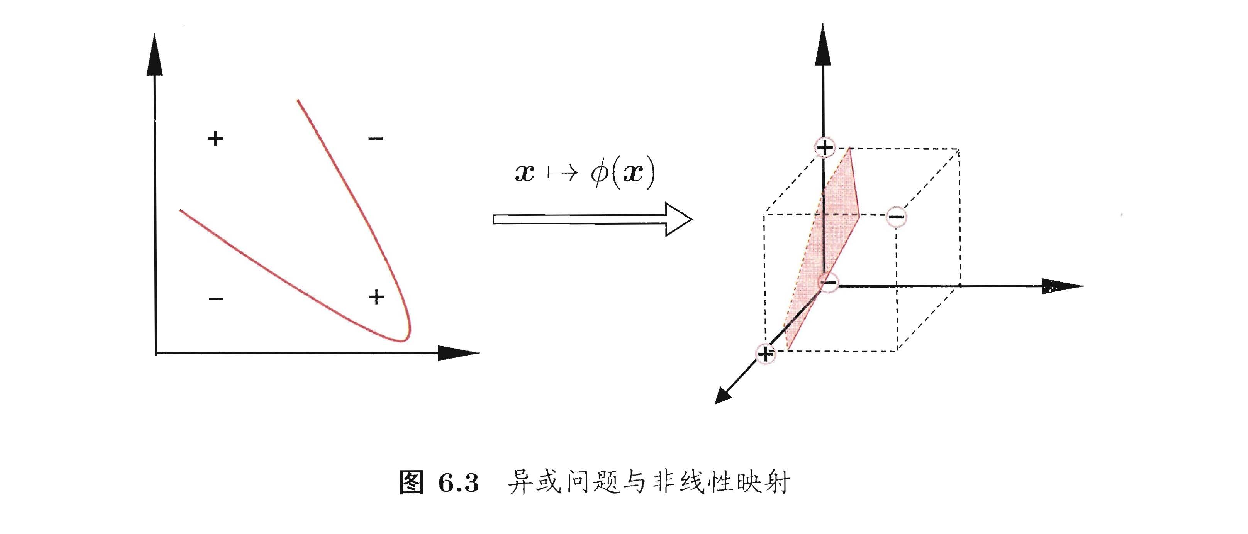

令$\phi(x)$表示将$x$映射后的特征向量，于是，在特征空间中划分超平面所对应的模型可表示为

$$
f(\boldsymbol{x})=\boldsymbol{w}^T \phi(\boldsymbol{x})+b
$$

其中$w$和$b$是模型参数，类似式

$$
\min _{\boldsymbol{w}, b} \frac{1}{2}\|\boldsymbol{w}\|^2
$$

$$
\text { s.t. } y_i\left(\boldsymbol{w}^{\mathrm{T}} \phi\left(\boldsymbol{x}_i\right)+b\right) \geqslant 1, \quad i=1,2, \ldots, m \text {. }
$$

其对偶问题是

$$
\begin{aligned}
\max _\alpha & \sum_{i=1}^m \alpha_i-\frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i \alpha_j y_i y_j \phi\left(\boldsymbol{x}_i\right)^{\mathrm{T}} \phi\left(\boldsymbol{x}_j\right) \\
\text { s.t. } & \sum_{i=1}^m \alpha_i y_i=0 \\
& \alpha_i \geqslant 0, \quad i=1,2, \ldots, m .
\end{aligned}
$$

求解上式涉及到计算 $\phi\left(\boldsymbol{x}_i\right)^{\mathrm{T}} \phi\left(\boldsymbol{x}_j\right)$这是样本$x_i$和$x_j$映射到特征空间之后的内积.由于特征空间维数可能很高，甚至可能是无穷维，因此直接计算$\phi\left(\boldsymbol{x}_i\right)^{\mathrm{T}} \phi\left(\boldsymbol{x}_j\right)$通常是困难的.为了避开这个障碍，可以设想这样一个函数:

$$
\kappa\left(\boldsymbol{x}_i, \boldsymbol{x}_j\right)=\left\langle\phi\left(\boldsymbol{x}_i\right), \phi\left(\boldsymbol{x}_j\right)\right\rangle=\phi\left(\boldsymbol{x}_i\right)^{\mathrm{T}} \phi\left(\boldsymbol{x}_j\right)
$$

即$x_i$和$x_j$在特征空间的内积等于它们在原始样本空间中通过函数 κ(.,.)计算的结果.有了这样的函数，我们就不必直接去计算高维甚至无穷维特征空间中的内积，于是对偶问题式子可重写为

$$
\begin{aligned}
\max _{\boldsymbol{\alpha}} & \sum_{i=1}^m \alpha_i-\frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i \alpha_j y_i y_j \kappa\left(\boldsymbol{x}_i, \boldsymbol{x}_j\right) \\
\text { s.t. } & \sum_{i=1}^m \alpha_i y_i=0 \\
& \alpha_i \geqslant 0, \quad i=1,2, \ldots, m
\end{aligned}
$$

求解后即可得到

$$
\begin{aligned}
f(\boldsymbol{x}) & =\boldsymbol{w}^{\mathrm{T}} \phi(\boldsymbol{x})+b \\
& =\sum_{i=1}^m \alpha_i y_i \phi\left(\boldsymbol{x}_i\right)^{\mathrm{T}} \phi(\boldsymbol{x})+b \\
& =\sum_{i=1}^m \alpha_i y_i \kappa\left(\boldsymbol{x}, \boldsymbol{x}_i\right)+b .
\end{aligned}
$$

这里的函$\kappa(\cdot, \cdot)$就是"**核函数**" (kernel function),上式显示出模型最优解可通过训练样本的核函数展开，这一展式亦称"支持向量展式"(support vector expansion).

显然，若己知合适映射 $\phi(.)$ 的具体形式，则可写出核函数 $\kappa(\cdot, \cdot)$.但在现实任务中我们通常不知道$\phi(.)$是什么形式，那么，合适的核函数是否一定存在呢?
什么样的函数能做核函数呢?我们有下面的定理:

**核函数** 令$\mathcal{X}$为输入空间，$\kappa(\cdot, \cdot)$是定义在 $\mathcal{X}X\mathcal{X}$ 上的对称函数，则$\kappa(\cdot, \cdot)$是核函数当且仅当对于任意数据$
D=\left\{\boldsymbol{x}_1, \boldsymbol{x}_2, \ldots, \boldsymbol{x}_m\right\}
$，"核矩阵" (kernel matrix) 总是半正定的:

$$
\mathbf{K}=\left[\begin{array}{ccccc}
\kappa\left(\boldsymbol{x}_1, \boldsymbol{x}_1\right) & \cdots & \kappa\left(\boldsymbol{x}_1, \boldsymbol{x}_j\right) & \cdots & \kappa\left(\boldsymbol{x}_1, \boldsymbol{x}_m\right) \\
\vdots & \ddots & \vdots & \ddots & \vdots \\
\kappa\left(\boldsymbol{x}_i, \boldsymbol{x}_1\right) & \cdots & \kappa\left(\boldsymbol{x}_i, \boldsymbol{x}_j\right) & \cdots & \kappa\left(\boldsymbol{x}_i, \boldsymbol{x}_m\right) \\
\vdots & \ddots & \vdots & \ddots & \vdots \\
\kappa\left(\boldsymbol{x}_m, \boldsymbol{x}_1\right) & \cdots & \kappa\left(\boldsymbol{x}_m, \boldsymbol{x}_j\right) & \cdots & \kappa\left(\boldsymbol{x}_m, \boldsymbol{x}_m\right)
\end{array}\right]
$$

定理表明，只要一个对称函数所对应的核矩阵半正定，它就能作为核函数使用.事实上，对于一个半正定核矩阵，总能找到一个与之对应的映射$\phi$. 换言之，任何一个核函数都隐式地定义了一个称为"再生核希尔伯特空间" (Reproducing Kernel Hilbert Space ，简称 RKHS) 的特征空间.<p>
通过前面的讨论可知，我们希望样本在特征空间内线性可分，因此特征空间的好坏对支持向量机的性能至关重要.需注意的是，在不知道特征映射的形式时，我们并不知道什么样的核函数是合适的，而核函数也仅是隐式地走义了这个特征空间.于是，"核函数选择"成为支持向量机的最大变数.若核函数选择不合适，则意味着将样本映射到了一个不合适的特征空间，很可能导致性能不佳.

常用的核函数有线性核函数、多项式核函数、高斯核函数(RBF核函数)和 sigmoid 核函数。核函数的选择需要结合数据实际情况，其中应用最广泛的是高斯核函数。<p>
Python中sklearn库中的svm模块可以实现支持向量机分类，svm.SVC()的主要参数有:①C，正则化参数，是对错误分类的惩罚程度，可以理解为松弛因子，必须为正数，默认为1.0。C越大，越不允许出现分类错误，越可能导致过拟合问题。②kernel，核函数，可以选择“linear”、“poly”、“rbf”和“sigmoid”等核函数，默认为“rbf”。③degree、gamma和coefo都是核函数的参数，degree默认为 3，gamma默认为“auto”，coef0默认为0.0。具体含义详见表11.4.2-1。④decision_function_shape，使用二分类算法来解决多分类问题的一种策略，有“ovr”、“ovo”和None三种。“ovr”在划分时采用一对剩余策略，将剩余的所有类型当作一类;“ovo”采用一对一策略，多个一对一进行组合就完成了多分类问题。

<table width="400" border="0" cellpadding="0" cellspacing="0" style='width:400.00pt;border-collapse:collapse;table-layout:fixed;'>
   <tr height="16.80" style='height:16.80pt;'>
    <td class="xl65" height="16.80" style='height:16.80pt;width:50.00pt;' x:str>核函数</td>
    <td class="xl65" x:str>参数</td>
    <td class="xl65" style='width:50.00pt;' x:str>解决问题</td>
    <td class="xl65" style='width:150.00pt;' x:str>函数形式</td>
    <td class="xl65" x:str>degree</td>
    <td class="xl65" x:str>gamma</td>
    <td class="xl65" x:str>coef0</td>
   </tr>
   <tr height="16.80" style='height:16.80pt;'>
    <td class="xl66" height="16.80" style='height:16.80pt;' x:str>线性核</td>
    <td class="xl66" x:str>linear</td>
    <td class="xl66" x:str>线性</td>
        <td align="right" x:num>$K(x,y)=x^Ty=x·y$</td>
    <td x:str>No</td>
    <td x:str>No</td>
    <td x:str>No</td>
   </tr>
   <tr height="16.80" style='height:16.80pt;'>
    <td class="xl66" height="16.80" style='height:16.80pt;' x:str>多项式核</td>
    <td class="xl66" x:str>poly</td>
    <td class="xl66" x:str>偏线性</td>
    <td align="right" x:num>$K(x,y)=(\gamma(x·y)+r)^d$</td>
    <td x:str>Yes</td>
    <td x:str>Yes</td>
    <td x:str>Yes</td>
   </tr>
   <tr height="16.80" style='height:16.80pt;'>
    <td class="xl66" height="16.80" style='height:16.80pt;' x:str>RBF核</td>
    <td class="xl66" x:str>rbf</td>
    <td class="xl66" x:str>偏非线性</td>
    <td align="right" x:num>$K(x,y)=\mathrm{e}^{-\gamma\|x-y\|^2}$</td>
    <td x:str>No</td>
    <td x:str>Yes</td>
    <td x:str>No</td>
   </tr>
   <tr height="16.80" style='height:16.80pt;'>
    <td class="xl66" height="16.80" style='height:16.80pt;' x:str>sigmoid核</td>
    <td class="xl66" x:str>sigmoid</td>
    <td class="xl66" x:str>非线性</td>
    <td align="right" x:num>$K(x,y)=tanh(\gamma(x·y)+r)$</td>
    <td x:str>No</td>
    <td x:str>Yes</td>
    <td x:str>Yes</td>
   </tr>
   <![if supportMisalignedColumns]>
    <tr width="0" style='display:none;'/>
   <![endif]>
  </table>

<font color='blue'>【例子11.4.1】下面我们使用支持向量机来对购买渠道数据集进行分类。</font> 

In [12]:
from sklearn import svm
svm_clf=svm.SVC(C=1,kernel ='rbf',gamma = 1, random_state = 0) # 配置支持向量机模型
svm_clf.fit(train_x,train_y)#训练模型,train_x等数据与决策树相同
accuracy3 =svm_clf. score(test_x,test_y)# 模型在测试集上的平均准确率
print("Accuracy:",accuracy3)
print('Predict:',list(svm_clf. predict(test_x[0:10])))
print('Actual:',list(test_y[0:10]))

NameError: name 'train_x' is not defined

可以看到支持向量机的准确率约为**XXXXXX**，**略好于决策树模型**

## 11.5 集成分类算法

我们可以看到朴素贝叶斯分类，决策树分类和支持向量机分类在购买渠道数据上的准确率都有提高的空间，有没有方法提升分类的准确率呢？接下来，我们将介绍三种利用已有的分类器进行更准确的分类的预测方法：Bagging、Boosting和投票机制。

### 11.5.1 Bagging 

<font color='red'>参考文献【3】3.python商业数据分析 张瑾 人大出版社+【4】scikit-learn 机器学习 2 加文·海克 中国工信出版集团</font><p>
**Bagging**是一种能减少一个估计器方差的集成元算法。**Bagging**可以用于类任务和回归任务。当组件估计器为回归器时，集成将平均它们的预测结果。当组件估计器为分类器时，集成将返回模类。使用Bagging方法构造出的模型会降低单一模型的误差,准确率有较大的提升，且对噪声数据的处理更加稳定。<p>
**Bagging**能在训练数据的变体上拟合多个模型。训练数据的变体使用一种称为**自发重采样**的流程来创建。通常来说，仅仅使用分布的一个样本来估计一个未知概率分布的参数是有必要的。我们可以使用这个样本来计算一个统计数值，但是这个统计数值将会随我们恰巧取到的样本而变化。自发重采样是一种估计统计数值不确定性的方法。当且仅当样本中的观测值被独立地选取时，该方法才能被使用。自发重采样通过重复地对原采样进行替换进行采样来产出采样的多个变体。所有的变体采样将具有和原采样相同数量的观测值，同时任何一个观测值可能会包含多次或零次。我们可以通过这些变体的每一个计算我们的统计数值，并使用这些统计数据通过创建一个置信区间或者计算标准误差来估计我们估计中的不确定性。我们来了解一个例子，如如下代码所示。

In [36]:
import numpy as np
# Sample 10 integers
sample=np.random.randint(low=1,high=100,size=10) 
print('Original sample: %s' % sample)
print('Sample mean:%s' % sample.mean())
# Bootstrap re-sample 100 times by re-sampling with replacement from the original sample
resamples=[np.random.choice(sample, size=sample.shape)for i in range(100)]
print('Number of bootstrap re samples: %s' % len(resamples)) 
print('Example re-sample:%s' % resamples[0])
resample_means=np.array([resample.mean() for resample in resamples])
print('Mean of re-samples \' means: %s' % resample_means.mean())


Original sample: [98  2 35 25 70 60 56 25  7 73]
Sample mean:45.1
Number of bootstrap re samples: 100
Example re-sample:[56 25 35 73 73 73 98  7 25 25]
Mean of re-samples ' means: 44.483000000000004


用**Bagging**构造模型这一方法的过程为:<p>
①从原始数据集中有放回地随机抽取T个与原始数据集样本量相等的数据集作为训练集，训练集之间是相互独立的;<p>
②利用T个训练集训练得到T个不同的模型，具体方法可以结合际问题进行选择;<p>
③利用T个模型对当前样本进行判断，用投票的方式得到最终分类结果。<p>
应用**Bagging**方法的典型方法是由 Leo Breiman 和 Adele Cutler提出的基于决策树分类器的**随机森林**(RandomForest)。随机森林在决策树的训练过程中引人了随机属性选择，即从属性集合中随机选择一个属性子集，然后从这个子集中选择最优属性作为分裂属性，对样本进行的分类预测则是由各个决策树输出类别的众数决定的。随机森林的分类性能往往优于单一决策树且非常稳定，降低了过拟合的风险。此外，随机森林在处理高维数据时不需要做特征选择，在训练完之后还可以给出比较重要的属性，因此在高维数据分析中有更好的优势。但随机森林的算法比决策树更为复杂，需要更多的训练时间，当噪音较大时易出现过拟合问题。

sklearn 库中的 ensemble 模块可以实现 Bagging 方法 ensemble. BaggingClassifier()的主要参数有:<p>
①base_estimator，基本模型，默认为决策树;<p>
②n_estimators，模型数量，默认为10;<p>
③max_samples和 max_features，分别是抽取的的最大样本数量和属性数量，可以直接指定数量，也可以是比例，默认为1。<p>
<font color='blue'>【例子11.5.1】下面我们对决策度树分类使用 Bagging 方法。</font> 

In [38]:
from sklearn import tree
from sklearn import ensemble
clf1=ensemble.BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion='entropy'),n_estimators=100,random_state=0)
clf1.fit(train_x,train_y)#训练模型
score=clf1.score(test_x,test_y)#模型在测试集上的平均准确率
print("Accuracy:",score)

NameError: name 'train_x' is not defined

可以看到使用Bagging方法的决策树模型的准确率提升至**XXXX**
此外，也可以直接通过ensemble。RandomForest.Classfier()进行随机森林的构建，函数参数与tree。DecisionTreeClassifier（）函数和ensemble.BaggingClassifier()函数类似，在购买渠道数据集上，随机森林的效果也有所提升

<font color='blue'>【例子11.5.2】下面我们对随机森林分类使用 Bagging 方法。</font>

In [39]:
clf2=ensemble.BaggingClassifier(random_state=0)
clf2.fit(train_x,train_y)
score2=clf2.score(test_x,test_y)
print("Accuracy:",score2) #

NameError: name 'train_x' is not defined

### 11.5.2 Boosting

<font color='red'>参考文献【3】python商业数据分析 张瑾 人大出版社</font>

**Boosting**是一种串行集成方法。通过将一个弱分类器转化为强分类器来减小偏差。Boosting 算法是一个不断迭代提升的过程，其基本思想是对每个训练样本赋予一个权重，通过学习生成一系列分类器，然后将这些分类器组合得到最终分类器。具体过程为:<p>
①基于训练集训练一个略好于随机方法的弱分类器，根据该弱分类器的分类结果新样本权重，如增大分类错误的样本的权重，减小分类正确的样本的权重，构成新的数据集;<p>
②利用新数据集再训练一个新的弱分类器，根据分类结果迭代样本权重组成新的数据集，如此重复便可得到若干个弱分类器;<p>
③利用这些弱分类器对当前样本进行判断，用技票的方式得到最终分类结果。<p>
使用**Boosting**方法的经典方法有 AdaBoost(Adaptive Boosting)算法中和梯度提升决策树(Gradient Boost Decision Tree，GBDT)算法。AdaBoost算法采用加权多数投票的方式，加大分类错误率小的弱分类器的权重，使其在分类过程中发挥更大的作用。Adaboost算法的精度高，构造过程比较灵活，不易过拟合，结果易理解，但对噪音数据敏感，噪音在迭代中可能会获得较高的权重，最终影响分类准确率。GBDT算法是一种迭代的决策树算法根据已知样本和已有模型损失函数的梯度，建立新的决策树以减少已有模型的残差，最后将所有模型组合就可以得到最终模型。GBDT算法能够灵活地处理连续型数据和离散型数据，预测精度高，该算法使用稳定性高的损失函数，对异常值的处理能力强。但由于弱分类器之间存在串行关系，难以并行训练数据，因此算法复杂度较高，比较适合低维数据的分类。<p>
ensemble模块中ensemble.AdaBoostClassifier()和ensemble.GradientBoostingClassifier()可以实现AdaBoost和GBDT算法。(1)**ensemble.AdaBoostClassifier()函数**的主要参数有:<p>
①base_estimator，基本模型，默认为决策树;<p>
②n_estimators，模型数量，默认为50;<p>
③learning_rate，学习率，默认为1;<p>
④algorithm，Boosting算法，可以选择“SAMM“或“SAMME.R”，前者是对样本中预测错误的概率进行划分，后者是对预测错误的比例进行划分，默认为后者。<p>
(2)**ensemble.GradientBoostingClassifier()函数**的主要参数有:<p>
①loss，损失函数，可以选择对数似然损失函数“deviance”和指数损失函数“exponential”，默认为前者;<p>
②learning_rate，学习率，默认为1;<p>
③subsample，拟合各基本模型的样本比例，默认为1，选择小于1的比例可以减少方差，防止过拟合;<p>
④criterion，分裂属性选择标准，可以选择“friedman_mse”、“mse”和“mae”，默认是表现最好的“friedman_mse”。其他参数与tree.DecisionTreeClassifier()函数类似。

<font color='blue'>【例子11.5.3】下面我们对使用 Boosting方法。</font>

In [49]:
clf3=ensemble.AdaBoostClassifier(random_state=0)
clf3.fit(train_x,train_y) #训练模型
score3=clf3.score(test_x,test_y) #模型在测试集上的平均准确率
print("Accuracy:",score3) #xxxx

clf4=ensemble.GradientBoostingClassifier(subsample=0.8,random_state=0)
clf4.fit(train_x,train_y) #训练模型
score4=clf4.score(test_x,test_y) #模型在测试集上的平均准确率
print("Accuracy:",score4) #xxxx

NameError: name 'train_x' is not defined

在这一数据集上，AdaBoost和GBDT算法的效果都有所提升。

Bagging和Boosting方法提高分类的准确率的方式略有差异，前者通过降低模型方差而后者通过降低模型偏差以达到提高分类的准确率的目的。

### 11.5.3 投票机制

<font color='red'>参考文献：西瓜书</font>

假定集成包$T$个基分类器$\{h_1,h_2,...,h_T\}$，其中$h_i$在示例$x$的输出$h_i(x)$

对分类任务来说，分类器$h_i$将从类别标记集合$\{c_1,c_2,...,c_T\}$中预测出一个标记，最常见的结合策略是使用投票法(voting). 为便于讨论，我们将$h_i$在样本$x$上的预测输出表示为一个$N$维向量 $(h^1_i(x);h^2_i(x);...;h^N_i(x))$，其中$h^j_i(x)$是$h_i$在类别标记$c_j$上的输出。

（1）**绝对多数投票法**(majority voting)

$$
H(\boldsymbol{x})= \begin{cases}c_j, & \text { if } \sum_{i=1}^T h_i^j(\boldsymbol{x})>0.5 \sum_{k=1}^N \sum_{i=1}^T h_i^k(\boldsymbol{x}) ; \\ \text { reject, } & \text { otherwise. }\end{cases}
$$

即若某标记得票过半数，则预测为该标记;否则拒绝预测。

（2）**相对多数投票法**(plurality voting)

$$
H(\boldsymbol{x})=c_{\underset{j}{\arg \max } \sum_{i=1}^T h_i^j(\boldsymbol{x}) .} 
$$

即预测为得票最多的标记，若同时有多个标记获最高票，则从中随机选取一个。

（3）**加权投票法**(weighted yoting)

$$
H(\boldsymbol{x})=c_{\underset{j}{\arg \max } \sum_{i=1}^Tw_i h_i^j(\boldsymbol{x}) .} 
$$

与加权平均法类似 w_i是h_i的权重，通常$\omega_i \geqslant 0, \sum_{i=1}^T w_i=1$

标准的**绝对多数投票法**提供了"**拒绝预测**"选项，这在可靠性要求较高的学习任务中是一个很好的机制.但若学习任务要求必须提供预测结果，则**绝对多数投票法**将***退化***为**相对多数投票法**.因此，在不允许拒绝预测的任务中，**绝对多数、相对多数投票法**统称为"**多数投票法**"。

在上述的投票方法中没有限制个体分类器输出值的类型.在现实任务中，不同类型个体分类器可能产生不同类型的时$h^j_i(x)$值，常见的有:

类标记 $h^j_i(x)\in\{0,1\}$，若$h_i$将样本$x$预测为类别$c_j$则取值为1，否则为O. 使用类标记的投票亦称"**硬投票**" (hard voting).

类概率$h^j_i(x)\in[0,1]$，相当于对后验概率 $P(c_j|x)$的一个估计.使用类概率的投票亦称"**软投票**" (soft voting).

不同类型的时$h^j_i(x)$值不能混用.对一些能在预测出类别标记的同时产生分类置信度的的分类器，其分类置信度可转化为类概率使用.若此类假未进行规范化?例如支持向量机的分类问隔值，则必须使用一些技术如Platts缩放(Platt scaling) [Platt, 2000] 、等分回归 (isotonic regression)[Zadrozny and Elkan, 2001]等进行"校准" (calibration) 后才能作为类概率使用.有趣的是，虽然分类器估计出的类概率值一般都不太准确?但基于类概率进行结合却往往比直接基于类标记进行结合性能更好.需注意的是，若基分类器的类型不同?则其类概率值不能直接进行比较;在此种情形下，通常可将类概率输出转化为类标记输出(例如将类概率输出最大的时$h^j_i(x)$设为1，其他设为0然后再投票。

## 11.6 分类性能度量

### 11.6.1 混淆矩阵

<font color='red'>参考文献【3】python商业数据分析 张瑾 人大出版社</font><p>
混淆矩阵(Confusion Matrix)是模式识别领域中一种常用的表达形式。它描绘样本数据的真实属性与识别结果类型之间的关系，是评体价分类器性能的一种常用方法。假设对于$N$类模式的分类任务，识别数据集$D$包括$T_0$个样样本，每类模式分别含有$T_i$个数据($i=1,2,…,N$)。采用某种识别算法构造分类器$C$，$cm_{i,j}$表示第$i$类模式被分类器$C$判断成第$j$类模式的数据占第$i$类模式样本总数的百分率，则则可得到$N$X$N$维混淆矩阵CM(C，D)，如下图所示。

$$
\mathrm{CM}(C, D)=\left(\begin{array}{cccccc}
\mathrm{cm}_{11} & \mathrm{~cm}_{12} & \cdots & \mathrm{cm}_{1 j} & \cdots & \mathrm{cm}_{1 N} \\
\mathrm{~cm}_{21} & \mathrm{~cm}_{22} & \cdots & \mathrm{cm}_{2 j} & \cdots & \mathrm{cm}_{2 N} \\
\cdots & \cdots & & \cdots & & \cdots \\
\mathrm{cm}_{i 1} & \mathrm{~cm}_{i 2} & \cdots & \mathrm{cm}_{i j} & \cdots & \mathrm{cm}_{i N} \\
\cdots & \cdots & & \cdots & & \cdots \\
\mathrm{cm}_{N 1} & \mathrm{~cm}_{N 2} & \cdots & \mathrm{cm}_{N j} & \cdots & \mathrm{cm}_{N N}
\end{array}\right)
$$

混淆矩阵中元素的行下标对应目标的真真实属性，列下标对应分类器产生的识别属性。对角线元素表示各模式能够被分类器C正硬确识别的百分率，而非对角线元素则表示发生错误判断的百分率。

假设数据集的类别分成正类（$+$）和负类（$-$），利用训练好的分类器对测试集进行类别预测，根据预测结果可以得到如表11.6.1-1所示的混淆矩阵。

 <table width="286.30" border="0" cellpadding="0" cellspacing="0" style='width:286.30pt;border-collapse:collapse;table-layout:fixed;'>
   <col width="48" style='width:48.00pt;'/>
   <col width="120" style='mso-width-source:userset;mso-width-alt:5851;'/>
   <col width="118.30" style='mso-width-source:userset;mso-width-alt:5768;'/>
   <tr height="16.80" style='height:16.80pt;'>
    <td class="xl65" height="16.80" rowspan="2" style='height:16.80pt;' x:str>预测</td>
    <td class="xl65" height="16.80" width="286.30" colspan="2" style='height:16.80pt;width:286.30pt;border-bottom:none;border-right:none;' x:str>实际</td>
   </tr>
    <tr height="16.80" style='height:16.80pt;'>
    <td class="xl67" x:str>+</td>
    <td class="xl67" x:str>-</td>
   </tr>
   <tr height="16.80" style='height:16.80pt;'>
    <td class="xl65" height="16.80" style='height:16.80pt;' x:str>+</td>
    <td class="xl67" x:str>正确的正样本数（TP）</td>
    <td class="xl67" x:str>错误的正样本数（FP）</td>
   </tr>
   <tr height="16.80" style='height:16.80pt;'>
    <td class="xl65" height="16.80" style='height:16.80pt;' x:str>-</td>
    <td class="xl67" x:str>错误的负样本数（FN）</td>
    <td class="xl67" x:str>正确的负样本数（TN）</td>
   </tr>
   <![if supportMisalignedColumns]>
    <tr width="0" style='display:none;'>
     <td width="120" style='width:120;'></td>
     <td width="118" style='width:118;'></td>
    </tr>
   <![endif]>
  </table>

混淆矩阵的四个数值可以计算其他常用的度量指标，具体如下表11.6.1-2所示

<table width="367.45" border="0" cellpadding="0" cellspacing="0" style='width:367.45pt;border-collapse:collapse;table-layout:fixed;'>
   <col width="129.15" style='mso-width-source:userset;mso-width-alt:6297;'/>
   <col width="120" style='mso-width-source:userset;mso-width-alt:5851;'/>
   <col width="118.30" style='mso-width-source:userset;mso-width-alt:5768;'/>
   <tr height="16.80" style='height:16.80pt;'>
    <td class="xl67" height="16.80" style='height:16.80pt;' x:str>指标</td>
    <td class="xl67" x:str>计算方式</td>
    <td class="xl67" x:str>含义</td>
   </tr>
   <tr height="16.80" style='height:16.80pt;'>
    <td class="xl68" height="16.80" style='height:16.80pt;' x:str>sensitivity/recall</td>
    <td class="xl68" x:str>TP/(TP+FN)</td>
    <td class="xl68" x:str>表示正样本中被正确分<span style='display:none;'>类的比例</span></td>
   </tr>
   <tr height="16.80" style='height:16.80pt;'>
    <td class="xl68" height="16.80" style='height:16.80pt;' x:str>specificity</td>
    <td class="xl68" x:str>TN/(FP+TN)</td>
    <td class="xl68" x:str>表示负样本中被正确分<span style='display:none;'>类的比例</span></td>
   </tr>
   <tr height="16.80" style='height:16.80pt;'>
    <td class="xl68" height="16.80" style='height:16.80pt;' x:str>accuracy</td>
    <td class="xl68" x:str>(TP+TN)/(TP+FN+TN+<span style='display:none;'>FP)</span></td>
    <td class="xl68" x:str>表示样本中被正确分类<span style='display:none;'>的比例</span></td>
   </tr>
   <tr height="16.80" style='height:16.80pt;'>
    <td class="xl68" height="16.80" style='height:16.80pt;' x:str>errorrate</td>
    <td class="xl68" x:str>(FP+FN)/(TP+FN+TN+F<span style='display:none;'>P)</span></td>
    <td class="xl68" x:str>表示正样本中被错误分类<span style='display:none;'>类的比例</span></td>
   </tr>
   <tr height="16.80" style='height:16.80pt;'>
    <td class="xl68" height="16.80" style='height:16.80pt;' x:str>precision</td>
    <td class="xl68" x:str>TP/(TP+FP)</td>
    <td class="xl68" x:str>表示预测是正类的样本<span style='display:none;'>确实是正类的比例</span></td>
   </tr>
   <tr height="16.80" style='height:16.80pt;'>
    <td class="xl68" height="16.80" style='height:16.80pt;' x:str>$F_{1-measure}$</td>
    <td class="xl68" x:str>(2$X$TP)/(2$X$TP+FP+FN)</td>
    <td class="xl68" x:str>recall和precision的调和<span style='display:none;'>平均数</span></td>
   </tr>
   <![if supportMisalignedColumns]>
    <tr width="0" style='display:none;'>
     <td width="129" style='width:129;'></td>
     <td width="120" style='width:120;'></td>
     <td width="118" style='width:118;'></td>
    </tr>
   <![endif]>
  </table>

上表中除errorate外的所有指标均为指标值越大，分类器的性能越好。<p>
除了上表之外，基于混淆矩阵可以定义的模型评估指标值还有很多，如下所示：

图 11.6.1-1
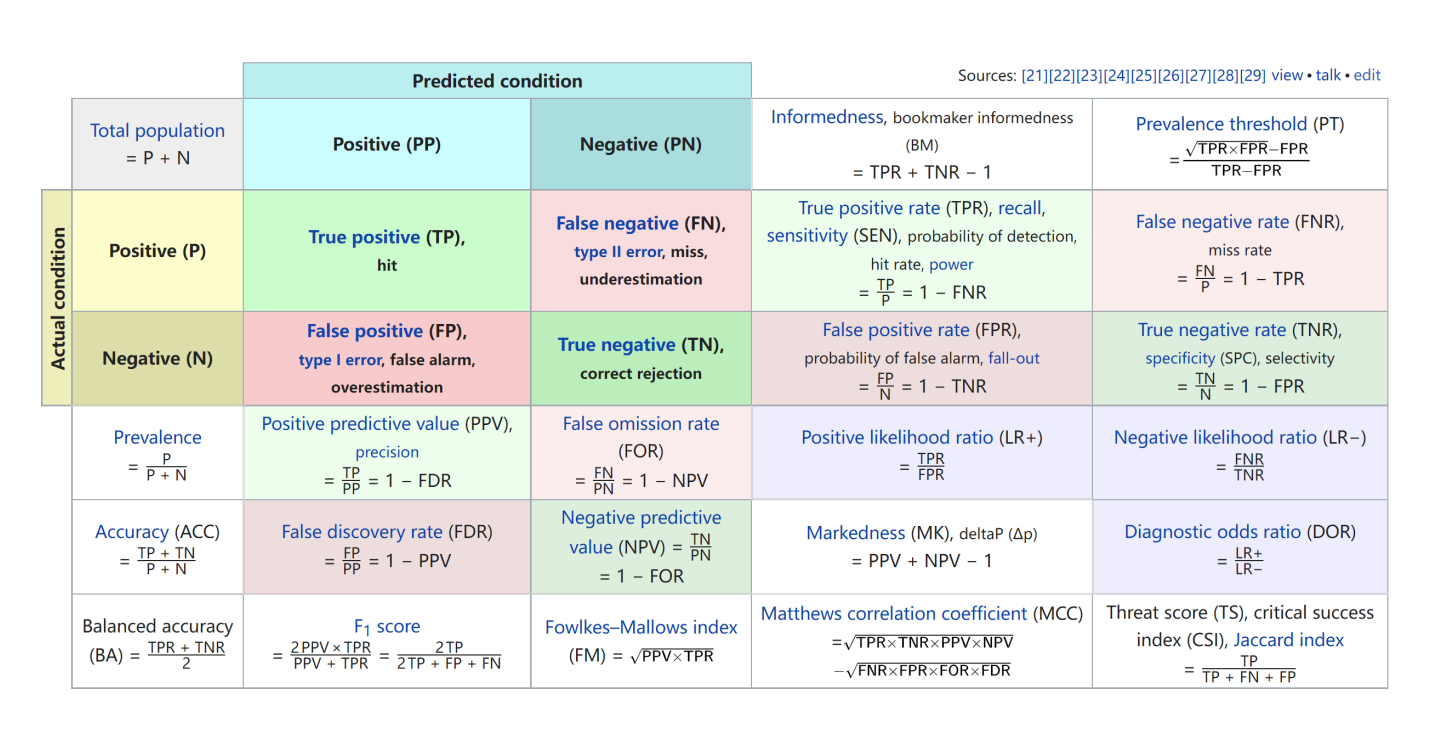

<font color='blue'>【例子11.6.1】下面我们对SVM预测测集输出混淆矩阵。</font>

In [9]:
from sklearn import metrics
pred_y=svm_clf.predict(test_x)#利用训练好的SVM预测测试集
print(metrics.confusion_matrix(y_true = test_y,y_pred = pred_y))
# 输出混淆矩阵
print('Accuracy:',metrics.accuracy_score(y_true = test_y,y_pred= pred_y))# 计算准确率,与 svm_clf.score(test_x,test_y)相同
print('Precision:',metrics.precision_score(y_true = test_y,y_pred =pred_y))#计算精确率
print('Recall:',metrics.recall_score(y_true = test_y,y_pred = pred_y))#计算召回率
print('F1-measure:',metrics.f1_score(y_true = test_y,y_pred = pred_y))#计算f1-measure

NameError: name 'svm_clf' is not defined

<font color='blue'>**【例11.6.1-1】**</font>：

### 11.6.2 ROC

（1）**ROC图**

<font color='red'>参考文献【1】数据挖掘原理（第四版） 麦可斯·布拉德 清华大学出版社</font>

同一测试集上的不同分类器的TPR(True Positive Rate）和FPR(False Positive Rate）值通常由ROC图表示。缩写**ROC Graph**表示“接收器操作特性曲线图”(Receiver Operating Characteristics Graph),它反映了在信号处理应用中的原始用途。其中TP Rate和FP Rate两者的定义为<p>

$$TPR=\frac{TP}{TP+FN}$$

$$FPR=\frac{FP}{TN+FP}$$

在ROC 图上(如图 11.6.2-1所示)**FPR**的值绘制在水平轴上，而**TPR**绘制在垂直轴上。

**如图 11.6.2-1所示**
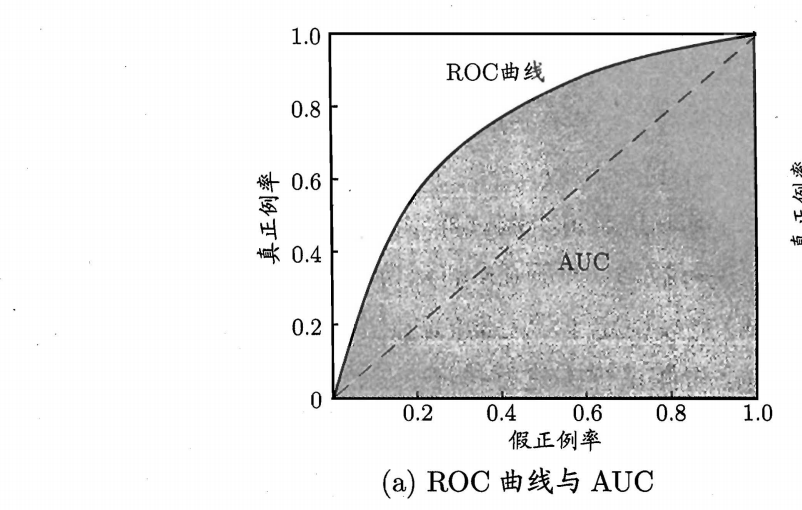

图上的每个点可写为一对值($x$,$y$)，表示**FPR**的值为$x$，**TPR**的值为$y$。<p>
点(0，1)、(1,0)、(1,1)和(0,0)分别对应于12.2节中的4种特殊情况 A、B、C和 D。第一个点位于图表的最佳位置，即左上角。第二个点可能是最糟糕的位置，即右下角。如果所有分类器都是良好分类器，则ROC图上的所有点都可能位于左上角。

显示的其他 6个点是(0.1,0.6)、(0.2,0.5)、(0.4,0.2)、(0.5, 0.5)、(0.7,0.7)和(0.2,0.7)。<p>
如果ROC图上的一个点位于另一个点的“西北”边，则表示前一个点对应的分类器优于后一个点对应的分类器。因此，由(0.1,0.6)表示的分类器优于由(0.2,0.5表示的分类器。它具有较低的**FPR**以及较高的**TPR**。如果比较点(0.1,0.6)和(0.2,0.7)，那么后者具有更高的**TPR**但同时具有更高的**FPR**。从这两点度量值看，没有哪个分类器优于另一个分类器，具体选择哪个分类器将取决于用户认为这两种度量值哪个更重要。<p>
连接左下角和右上角的对角线对应于随机猜测，无论正例类别的概率如何。如果分类器以相同的频率随机猜测正例和负例,它将以50%的概率正确分类正例实例,同时以50%的概率将负例实例错误分类为正例。因此**TPR**和**FPR**都是0.5,此时分类器将位于对角线上(0.5,0.5)。<p>
类似地，如果分类器随机地猜测正例和负例，并且70%的情况下选择正例，那么它将以70%的概率正确分类正例实例，同时以70%的概率错误地将负例实例分类为正例。因此**TPR**和**FPR**都是0.7，分类器将位于对角线上(0.7,0.7)。<p>
可认为对角线上的点对应于大量随机分类器，对角线上的较高点对应于随机生成的正例分类的较高比例。<p>
左上角的三角形对应于比随机猜测更好的分类器。而右下角的三角形则对应于比随机猜测更差的分类器，例如(0.4,0.2)处的分类器。<p>
比随机猜测更差的分类器可以简单地通过反转其预测转换为比随机猜测更多的分类器，是的每一个正例预测变为负例，反之亦然。通过这种方法，可将（0.4,0.2）处的分类器转换为图11.6.2-2中（0.2,0.4）处的新分类器。后一个点是前一个点关于对角线的映射。

图11.6.2-2
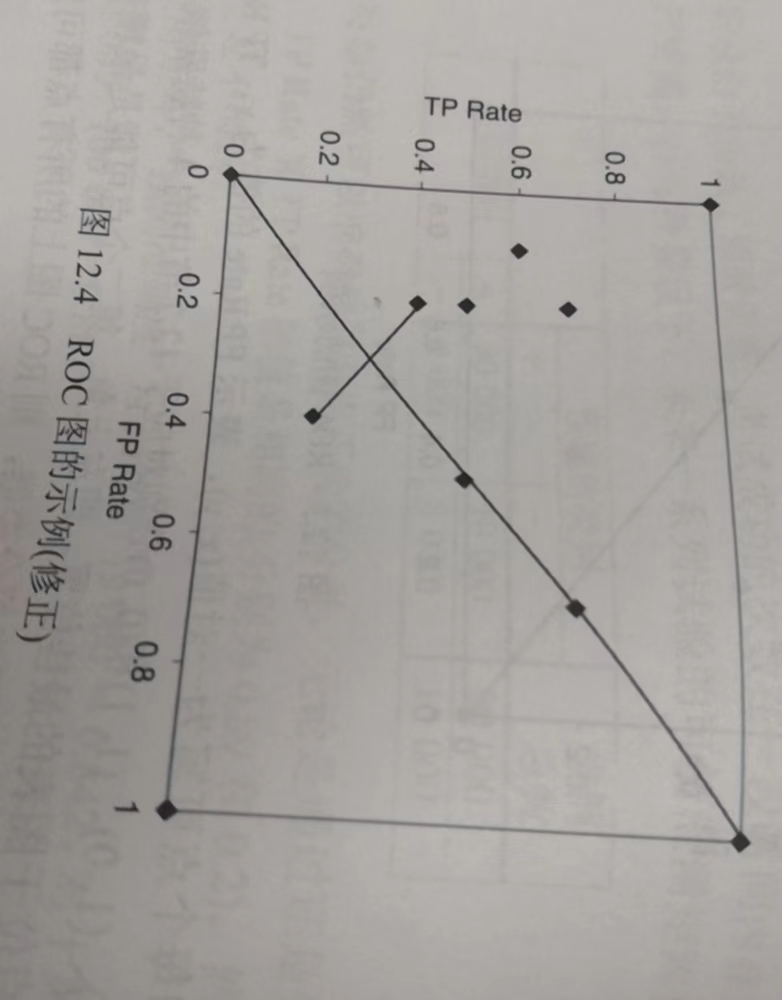

(2)**ROC曲线**

通常，每个分类器对应于ROC图上的单个点。然而，一些分类算法适用于“调谐”，因此，考虑一系列分类器是合理的，一些在变量的值在ROC图上都对应一个点，通常称为“参数”。而对于决策树分类器而言， 这样的参数可能是在 1、2、3 等值之间变化的“深度截断值”(参见11.3)。
这种情况下，可将点连接起来形成ROC曲线，如图11.6.2-3所示。

如图11.6.2-3所示
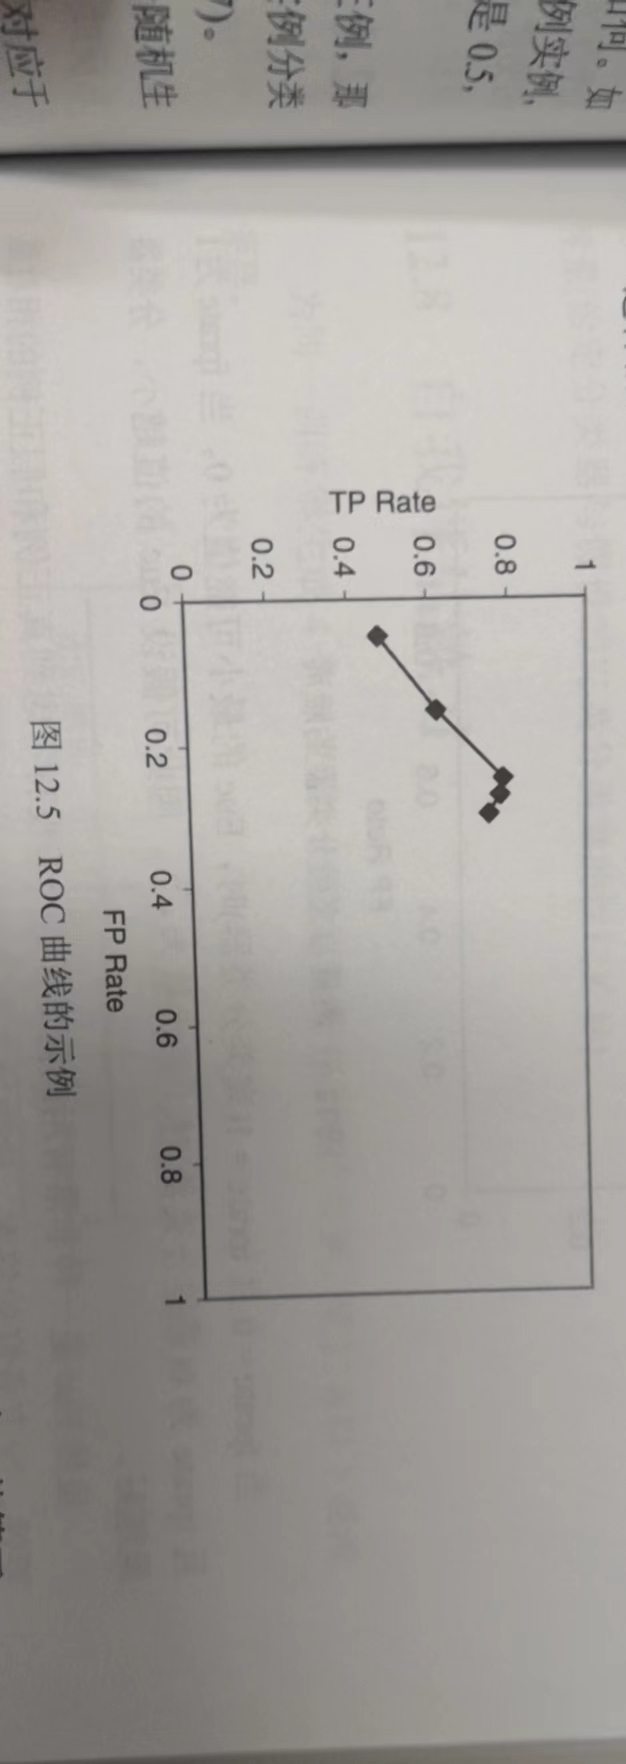

研究ROC曲线帮助我们了解优化分类算法的最佳方法。在图11.6.2-3中，从第三个点之后性能明显降低。<p>
可通过检查其ROC曲线来比较具有不同参数的不同类型分类器的性能。

（3）**AUC**

<font color='red'>参考文献  西瓜书</font>

当需要进行分类器的比较时，一个分类器的 ROC曲线被另一个分类器的曲线完全"包住"，则可断言后者的性能优于前者;若两个分类器的ROC曲线发生交叉，则难以-般性地断言两者孰优孰 此时如果一定要进行比较 则较为合理的判据是比较ROC曲线下的面积，即AUC(Area Under ROC Curve) ，如图11.6.2-3 所示

图11.6.2-3
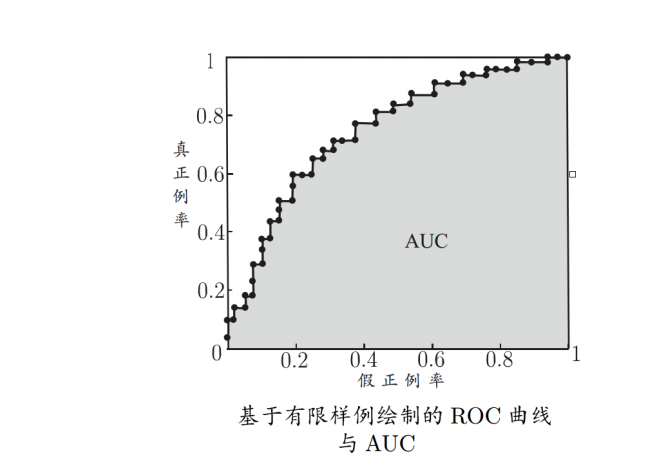

从定义可知， **AUC**通过对 ROC 线下各部分的面积求和而得，假定ROC曲线是由坐标为$\{(x_1,y_1),(x_2,y_2) ,..., (x_m, y_m)\}$ 的点按序连接而形成$(x_1=0, x_m=1) 参见上图，则**AUC**可估算为：

$$
\mathrm{AUC}=\frac{1}{2} \sum_{i=1}^{m-1}\left(x_{i+1}-x_i\right) \cdot\left(y_i+y_{i+1}\right)
$$

形式化地看， AUC 考虑的是样本预测的排序质量，因此它与排序误差有紧密联系.给定$m^+$个正例和$m^-$个反例，令$D^+$和$D^-$分别表示正、反例集合，则排序"损失" (loss) 定义为:

$$
\ell_{r a n k}=\frac{1}{m^{+} m^{-}} \sum_{\boldsymbol{x}^{+} \in D^{+}} \sum_{\boldsymbol{x}^{-} \in D^{-}}\left(\mathbb{I}\left(f\left(\boldsymbol{x}^{+}\right)<f\left(\boldsymbol{x}^{-}\right)\right)+\frac{1}{2} \mathbb{I}\left(f\left(\boldsymbol{x}^{+}\right)=f\left(\boldsymbol{x}^{-}\right)\right)\right)
$$

即考虑每一对正、反例,若正例的预测值小于反例,则记一个"罚分"等,则记己 0.5 个"罚分"容易看出$\ell_{r a n k}$对应的是ROC曲线之上的面积:若
一个正例在 ROC 曲线上对应标记点的坐标为$(x,y)$,恰是排序在其之前的反例所占的比例,即假正例率.因此有

$$
\mathrm{AUC}=1-\ell_{r a n k}
$$

<font color='blue'>【例子11.6.2】下面我们对SVM预测测集的混淆矩阵输出ROC曲线图和AUC面积。</font>

In [5]:
import matplotlib.pyplot as plt
fpr,tpr,threshold=metrics.roc_curve(y_true=test_y,y_score=pred_prob) #计算ROC
print('AUC:',metrics.auc(x=fpr,y=tpr))#基于ROC的结果计算AUC
print('AUC:',mentrics.roc_auc_score(y_true=test_y,y_score=pred_prob))#直接计算AUC
plt.plot(fpr,tpr,color ='black',label ='ROC curve(area =%0.2f)' % metrics.auc(fpr,tpr))
plt.plot([0,1],[0,1],color ='blue',lineestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')
plt.legend(loc="lower right")
plt.show()

NameError: name 'metrics' is not defined

<font color='red'>补充参考文献 【2】</font>

**ROC曲线**是一种比较两个分类模型的有用的可视工具。ROC表示Receiver Operatin aracteristic(接收者运行特征)。ROC曲线源于信号检测理论，是第二次世界大战期间为达图像分析开发的。ROC曲线显示了给定模型的真正率或灵敏度(正确识别的正元组的比例)与假正率(不正确地识别为正元组的负元组的比例)之间的比较评定。也就是说，给定一个二类问题，我们可以对检验集的不同“部分”，显示模型可以正确识别“yes”实例的比例与
模型将“no”实例错误地识别为“yes”的比例之间的比较评定。真正率的增加以假正率的增加为代价。ROC曲线下面的面积是模型准确率的度量。<p>
为了绘制给定分类模型**M**的ROC曲线，模型必须能够返回每个检验元组预测类的概率或秩评定。也就是说，需要对检验元组按递减序确定秩，其中分器认为最可能属于正类或“yes“类的元组出现在列表顶部。朴素贝叶斯和后向传播分类器是合适的，而其他(如决策树分器)可能容易修改，以便返回每个预测的类概率分布。ROC曲线的垂直轴表示真正率，水轴表示假正率。**M**的ROC曲线按以下方法绘制。从左下角开始(这里，真正率和假正率都为0)，检查列表顶部元组的实际类标号。如果它是真正元组(即正确分类的正元组)，则在ROC曲线上，我们向上移动并绘制一个点。如果元组实际属于“no”类，则有一个假正元组。在ROC曲线上，我们向右移动并绘制一个点。对每个检验元组重复该过程，每次对真正元组在曲上向上移动，对假正元组向右移动。<p>
图11.6.2-1显示两个分类模型的ROC曲线。该图还显示了一条对角线。对于这种模型的每个真正，我们很可能会遇到一个假正。这样，模型的ROC曲线离对角线越近，模型的准确率越低。如果模型实际很好，随着在有秩列表向下移动，开始多半会遇到真正元组。这样，曲线将陡峭地从0开始上升。后来，我们遇到的真正元组越来越少，假正元组越来越多，曲线平缓并变得更加水平。

图11.6.2.1

为了评估模型的准确率，可以测量曲线下方的面积。有一些软件包可以进行这些计算，面积越接近0.5，对应模型的准确率越低。完全准确的模型的面积为1。

### 11.6.3 寻找最佳分类器

<font color='red'>参考文献 【1】</font>欧几里得距离度量

对于给定应用程序，没有绝对可靠的方法找到最佳分类器，除非碰巧找到一个对应于**ROC图**上(0,1)点的完美性能的分类器。可使用的一种方法是测量**ROC图**上的分类器与完美分类器的距离。<p>
图11.6.3-1显示了点(FPR，TPR)和(0，1)。它们之间的欧几里得距离$\sqrt{FPR^2+TPR^2}$。<p>
可写成 $Euc=\sqrt{FPR^2+TPR^2}$。

当FPR=0且TPR=1(完美分类器)时，Euc的最小可能值为0。当FPR为1且TPR为0(最差分类器)时，最大值为$\sqrt{2}$。因此可假设Euc的值越小，分类器就越好。<p>
虽然Euc是一种非常有用的衡量标准，但没有考虑到真正例和假正例的相对重要性。没有最好的答案。这取决于分类器的用途。<p>
可指定相对重要性(使TPR尽可能接近于1，同时使FPRate尽可能接近于0)，并使权值$w$从0到1，从而定义加权欧几里得距离。<p>
$$WEuc=\sqrt{(1-w)FPR^2+wTPR^2}$$<p>
如果$w$=0，则WEuc=FPR，即我们只对最小化TPR的值感兴趣。<p>
如果$w$=1，则WEuc=1-TPR，即我们只对最小化TPR和1之间的差异感兴趣(也就是说最大化TPR)。<p>
如果$w$=0.5，则公式变为:<p>
$$WEuc=\sqrt{0.5*FPR^2+0.5*TPR^2}$$<p>
它是$\sqrt{FPR^2+TPR^2}$的一个常数倍，因此将一个分类器与另一个分类器进行比较的效果与没有加权的情况是相同的。<p>

<font color="red">参考文献 python数据分析与挖掘实战   张良均。  机械工业出版社</font>


分类模型对训练集进行预测而得出的准确率并不能很好地反映模型未来的性能，为了有效判断一个模型的性能表现，需要一组没有参与模型建立的数据集，并在该数据集上评价模型的准确率，这组独立的数据集叫作测试集。模型预测效果评价通常用相对/绝对误差、平均绝对误差、均方误差、均方根误差等指标来衡量。<p>
(1)绝对误差与相对误差
设$Y$表示实际值，$\hat{Y}$表示预测值，则称$E$为绝对误差(Absolute Error)，计算公式如下。<p>
$$E=Y-\hat{Y}$$
$e$为相对误差(RelativeError)，计算公式如下。<p>
$$e=\frac{Y-\hat{Y}}Y$$
有时相对误差也用百分数表示。
$$e=\frac{Y-\hat{Y}}Y *100\%$$
这是一种直观的误差表示方法。

(2)平均绝对误差
平均绝对误差（MeanAbsoluteError，MAE）定义如下

$$
M A E=\frac{1}{n} \sum_{i=1}^n\left|E_i\right|=\frac{1}{n} \sum_{i=1}^n\left|Y_i-\hat{Y}_i\right|
$$

式中各项的含义如下:<p>
MAE:平均绝对误差。<p>
$E_i$:第i个实际值与预测值的绝对误差。 <p>
$Y_i$:第i个实际值。<p>
$\hat{Y}_i$:第i个预测值。<p>
由于预测误差有正有负，为了避免正负相抵消，胡故取误差的绝对值进行综合并取其平均数，这是误差分析的综合指标法之一。

（3）均方误差<p>
均方误差（Mean Squared Error，MSE）定义如下。
$$
M S E=\frac{1}{n} \sum_{i=1}^nE^2_i=\frac{1}{n} \sum_{i=1}^n(Y_i-\hat{Y}_i)^2
$$

在上式中，MSE表示均方差，其他符号同前。<p>
本方法用于还原平方失真成程度。<p>
均方误差是预测误差平方之和的平均数，它避免了正负误差不能相自加的问题。由于对误差E进行了平方，加强了数值大的误差在指标中的作用，从而提高了这这个指标的灵敏性，是一大优点。均方误差是误差分析的综合指标法之一。

（4）均方根误差<p>
均方根误差（Root Mean Squared Error，RMSE）定义如下。
$$
R M S E=\sqrt{\frac{1}{n} \sum_{i=1}^nE^2_i}=\sqrt{\frac{1}{n} \sum_{i=1}^n(Y_i-\hat{Y}_i)^2}
$$

上式中，RMSE表示均放方根误差，其他符号同前。<p>
这是均方误差的平方根，代表了预测值的离散程度，也称为标准误差，最佳拟合情况为$RMSE=0$。均方根误差也是误差分析的综合指标之一。


（5）平均绝对百分误差<p>
平均绝对百分误差(Mean Absolute Percentage Error,MAPE)定义如下。
$$
M A P E=\frac{1}{n} \sum_{i=1}^n\left|E^2_i/Y_i\right|=\frac{1}{n} \sum_{i=1}^n\left|(Y_i-\hat{Y}_i)^2/Y_i\right|
$$

上式中，MAPE表示平均绝对百分误差。一般认为MAPE小于10时，预测精度较高。

（6）识别准确度<p>
识别准确度（Accuracy）定义如下。
$$Accuracy=\frac{TP+FN}{TP+TN+FP+FN}X100\%$$

TP,FN,TN,FP 如混淆矩阵中的定义说明。

（7）识别精确率<p>
识别精确率（Precision）定义如下。
$$Precision=\frac{TP}{TP+FP}X100\%$$

（8）反馈率<p>
反馈率（反馈率）定义如下。
$$Recall=\frac{TP}{TP+TN}X100\%$$

上面的指标值可以反映出分类器的性能越好坏。


### 11.6.4 过拟合和欠拟合

<font color='red'>参考文献  西瓜书+ppt（王熙老师class 6)</font>

通常我们把分类错误的样本数占样本总数的比例称为"错误率" (errorrate) ，即如果在个样本中有个样本分类错误，则错误率$E=\alpha/m$；相应的，
$1-\alpha/m$称为"精度" (accacy) ，即"**精度=1-错误率**"更一般地，我们把学习器的实际预测输出与样本的真实输出之间的差异称为"误差" (error), 学习器在训练集上的误差称为"训练误差" (training error) 或"经验误差" (empirical error)，在新样本上的误差称为"泛化误差" (generalization error). 显然，我们希望得到泛化误差小的学习器.然而，我们事先并不知道新样本是什么样，实际能做的是努力使经验误差最小化.在很多情况下，我们可以学得一个经验误差很小、在训练集上表现很好的学习器，例如甚至对所有训练样本都分类正确，即分类错误率为零，分类精度为 100% ，但这是不是我们想要的学习器呢?遗憾的是，这样的学习器在多数情况下都不好.<p>
我们实际希望的，是在新样本上能表现得很好的学习器.为了达到这个目的，应该从训练样本中尽可能学出适用于所有潜在样本的"普遍规律"，这样才能在遇到新样本时做出正确的判别.然而，当学习器把训练样本学得"太好"了的时候，很可能巳经把训练样本自身的一些特点当作了所有潜在样本都会具有的一般性质，这样就会导致泛化性能下降这种现象在机器学习中称为"**过拟合**" (overfitting). 与"**过拟合**"相对的是"**欠拟合**" (underfitting) ，这是指对训练样本的一般性质尚未学好.图 2.1 给出了关于**过拟合**与**欠拟合**的一个便于直观理解的类比.

图 11.6.4.1
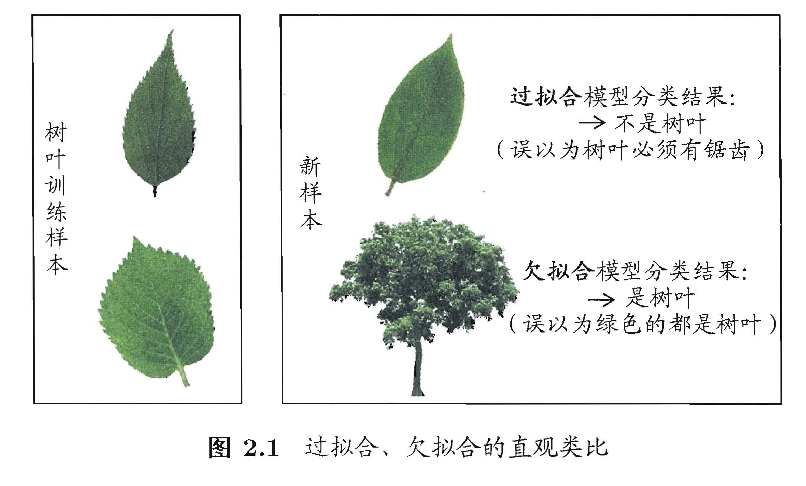

**过拟合**：当学习器把训练样本学的‘太好了’的时候，很可能已经把训练样本自身的一些特点当做了所有潜在样本都会具有的一般性质，这样会导致泛化性能下降，这种现象称为过度拟合。<p>
**欠拟合**：对训练样本的一般性质尚未学好.这种现象称为欠拟合。

有多种因素可能导致过拟合，其中最常见的情况是由于学习能力过于强大，以至于把训练样本所包含的不太一般的特性都学到了，而欠拟合则通常是由于学习能力低下而造成的，欠拟合比较容易克服，例如在决策树学习中扩展分支、在神经网络学习中增加训练轮数等，而过拟合则很麻烦.在后面的学习中我们将看到，过拟合是机器学习面临的关键障碍，各类学习算法都必然带有一些针对过拟合的措施;然而必须认识到，过拟合是无法彻底避免的，我们所能做的只是"缓解'，或者说减小其风险.关于这一点，可大致这样理解:机器学习面临的问题通常是**NP**难甚至更难，而有效的学习算法必然是在多项式时间内运行完，若可彻底避免过拟合， 则通过经验误差最小化就能获最优解，这就意味着我们构造性地证明了"P=NP";因此 只要相信 "P$\neq$NP" ，过拟合就不可避免。